# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from dqn_agent import Agent
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Actions in the Environment

In the next code cell, a Deep-Q network will be used to control the agent.

Episode 100	Average Score: 0.02
Episode 200	Average Score: 0.652
Episode 300	Average Score: 1.32
Episode 400	Average Score: 2.14
Episode 500	Average Score: 3.35
Episode 600	Average Score: 4.21
Episode 700	Average Score: 5.17
Episode 800	Average Score: 6.23
Episode 900	Average Score: 6.46
Episode 1000	Average Score: 8.18
Episode 1100	Average Score: 8.01
Episode 1200	Average Score: 8.91
Episode 1300	Average Score: 9.71
Episode 1400	Average Score: 8.74
Episode 1500	Average Score: 10.56
Episode 1600	Average Score: 10.83
Episode 1700	Average Score: 11.29
Episode 1800	Average Score: 11.94
Episode 1900	Average Score: 11.82
Episode 2000	Average Score: 11.92
Episode 2100	Average Score: 12.41
Episode 2145	Average Score: 13.43
Environment solved in 2045 episodes!	Average Score: 13.43


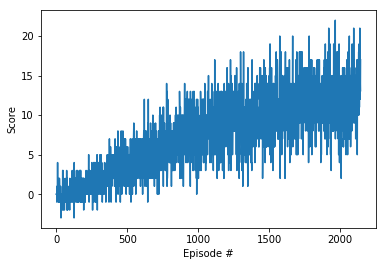

In [5]:
agent = Agent(state_size, action_size)

def dqn(n_episodes=3000, eps_start=1.0, eps_end=0.001, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    N=100                            # Contains size of scoring window
    scores = []                      # list containing scores from each episode
    scores_window = deque(maxlen=N)  # last 100 scores
    eps = eps_start                  # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while True:
            action = agent.act(state, eps)                 # agent takes action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # agent takes learning step
            state = next_state                             # update state
            score += reward                                # update total score
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        # Print Score while training
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % N == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        # Stop when required average score of 13 (+ a little extra buffer) is reached
        if np.mean(scores_window) >= 13.4:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-N, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [6]:
env.close()

### Ideas for Future Work

The following are ideas for potential improvement:
- Include improvements to Deep Q-Networks such as prioritized experience replay
- Try different Neural Network architectures to try to get more sample efficient learning
- Keep exploring the parameter space! This implementation did not a wide variation in parameter values.
